In [ ]:
# Multiple Linear Regression using Python
In this notebook we will solve a Multiple Linear Regression problem using Python programming language. In order to do this we will use some commonly used libraries for solving machine learning tasks, these includes Pandas, Numpy, Matplotlib and Scikit-learn.

## Task 1:

Suppose we want to determine the price per unit area of a house in a dataset of historical purchases made in an area in which we have multiple features such as __*transaction_number, transaction_date, house_age, distance_to_nearest_bus_station, number_of_convenience_stores, latitude, and longitude.*__


The objective of this task is to train a ML regression model that can accurately predict the price per unit area of a given house.

![alt text](img/real_estate.jpg "Real Estate")

### Step 1: Importing Libraries for our task

In [25]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### 2. Reading the data from the provided file
Since the data is in a CSV format, we are going to read this file using the pandas's read_csv method

In [26]:
df = pd.read_csv('dataset/03-real_estate_dataset.csv')

### 3. Exploring the data 
Let us explore the data 

In [27]:
df.shape

(414, 8)

In [28]:
df.head()

,number,transaction_date,house_age,distance_to_nearest_bus_station,number_of_convenience_stores,latitude,longitude,unit_area_price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [29]:
df.describe()

,number,transaction_date,house_age,distance_to_nearest_bus_station,number_of_convenience_stores,latitude,longitude,unit_area_price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


After exploring our data, we can use our intuition, to drop some of the features that might have no contribution to our model

In [30]:
df = df.drop('number', axis=1)
df = df.drop('transaction_date', axis=1)
df.head()

,house_age,distance_to_nearest_bus_station,number_of_convenience_stores,latitude,longitude,unit_area_price
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


### 4. Splitting the data into training and test sets

In [31]:
X = df.iloc[:, :-1]
y = df.iloc[:,df.shape[1]-1]

In [32]:
X.head()

,house_age,distance_to_nearest_bus_station,number_of_convenience_stores,latitude,longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### 5. Building the model to fit the training data

In [34]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### 6. Using the model to make predictions for the test data set 

In [35]:
y_pred = model.predict(X_test)

In [36]:
print(f'b = {model.intercept_}')
print(f'w = {model.coef_}')

b = -1194.2145132626463
w = [-2.65600030e-01 -4.74964456e-03  1.13434674e+00  2.28565503e+02
 -3.67741638e+01]


### 7. Evaluating our model performance

In [37]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 66.75
Coefficient of determination: 0.58


We can use our model to make different kinds of predictions as follows

In [38]:
data = {
'house_age':[32.0],
'distance_to_nearest_bus_station': [84.87882],
'number_of_convenience_stores':[10],
'latitude':[24.98298],
'longitude':[121.54024],
}

data = pd.DataFrame(data)
val = model.predict(data)
print(val)

[48.93331686]


In [ ]:
## Task 2
The aim of this task is to build a model which predicts sales based on the money spent on different platforms such as TV, radio, and newspaper for marketing by using Simple Linear Regression and Multiple Linear Regression. The dataset contains the following features ***TV, Radio, Newspaper*** and the target column is ***Sales*** 

Hint: _For Simple Linear Regression, select the feature with the highest correlation with the target column._

Compare the Mean Squared error and Coefficient of determination for both models

                                                            #SOLUTION TO TASK_2

#STEP 1: IMPORTING LIBRARIES

In [115]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#STEP 2: READING DATA FROM PROVIDED FILE

In [116]:
df = pd.read_csv('dataset/04-advertising_dataset.csv') 

In [117]:
df.shape

(200, 4)

#STEP 3: EXPLORING THE DATA

In [118]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [119]:
import pandas as pd

# Assuming 'your_data.csv' is your dataset file, replace it with the actual file path or URL.
data = pd.read_csv('dataset/04-advertising_dataset.csv')

# Now you can use data.info() without any issues.
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [120]:
data.isnull().sum

<bound method DataFrame.sum of         TV  Radio  Newspaper  Sales
0    False  False      False  False
1    False  False      False  False
2    False  False      False  False
3    False  False      False  False
4    False  False      False  False
..     ...    ...        ...    ...
195  False  False      False  False
196  False  False      False  False
197  False  False      False  False
198  False  False      False  False
199  False  False      False  False

[200 rows x 4 columns]>

In [121]:
data.duplicated().sum()

0

In [122]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

#STEP 4: SPLITTING THE DATA INTO TRAINING AND TEST SETS 

In [123]:
X = data.iloc[:, :-1].values
y = data.iloc[:,-1].values

In [124]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [125]:
#Alternatively

In [126]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable, replace them with your actual data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


#STEP 5: BUILDING THE MODEL TO FIT THE TRAINING DATA

In [127]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [128]:
#Alternatively

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable, replace them with your actual data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

#STEP 6: USING THE MODEL TO MAKE PREDICTIONS FOR THE TEST DATA SET

In [130]:
y_pred = model.predict(X_test)

In [131]:
print(f'b = {model.intercept_}')
print(f'w = {model.coef_}')

b = 4.74184224412457
w = [0.05461383 0.09975946 0.00430495]


#STEP 7: EVALUATING OUR MODEL PERFORMANCE

In [132]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 2.40
Coefficient of determination: 0.91


In [133]:
#Alternatively

In [134]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable, replace them with your actual data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error and coefficient of determination
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Mean squared error: 2.40
Coefficient of determination: 0.91


In [135]:
data = {
'TV':[230.1],
'Radio': [37.8],
'Newspaper':[69.2],
}
data = pd.DataFrame(data)
val = model.predict(data)
print(val)

[21.37729583]


C:\Users\Abdulkarim\miniconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Task 3:

To develop the best medical insurance products, the insurer needs access to historical data to approximate the medical costs of each user. With this data, a medical insurer can develop more accurate pricing models, plan a particular insurance outcome. For all these cases, the objective is to accurately predict insurance costs.

![alt text](img/health_insurance.jpg "Health Insurance")


#### Dataset
You are provided with a dataset in the **dataset/04-insurance_charges.csv** file that contains medical insurance records. The individual medical costs billed by health insurance are the target variable charges, and the rest of columns contain personal information such as age, gender, family status, and whether the patient smokes among other features.
The following is the description of the features contained in the dataset: 
- **age:** age of primary beneficiary
- **sex:** insurance contractor gender, female, male
- **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- **children:** Number of children covered by health insurance / Number of dependents
- **smoker:** Smoking
- **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- **charges:** Individual medical costs billed by health insurance

#### Use Case
The objective is to train a ML regression model that can accurately predict the insurance costs for a given individual



                                                        #SOLUTION TO TASK 3

#STEP 1: IMPORTING LIBRARIES

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#STEP 2: READING DATA FROM PROVIDED FILE

In [4]:
data_frame = pd.read_csv('dataset/05-insurance_charges.csv')

In [5]:
data_frame.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data_frame.shape


(1338, 7)

#STEP 3: EXPLORING THE DATA

In [7]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data_frame.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

data_frame['sex'] = le.fit_transform(data_frame['sex'])
data_frame['smoker'] = le.fit_transform(data_frame['smoker'])
data_frame['region'] = le.fit_transform(data_frame['region'])

In [11]:
# feature scalling by using minmaxscaler method
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

data_frame['bmi'] = scaler.fit_transform(data_frame['bmi'].values.reshape(-1,1))

In [12]:
data_frame.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,0.321227,0,1,3,16884.92400
1,18,1,0.479150,1,0,2,1725.55230
2,28,1,0.458434,3,0,2,4449.46200
3,33,1,0.181464,0,0,1,21984.47061
4,32,1,0.347592,0,0,1,3866.85520


In [13]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


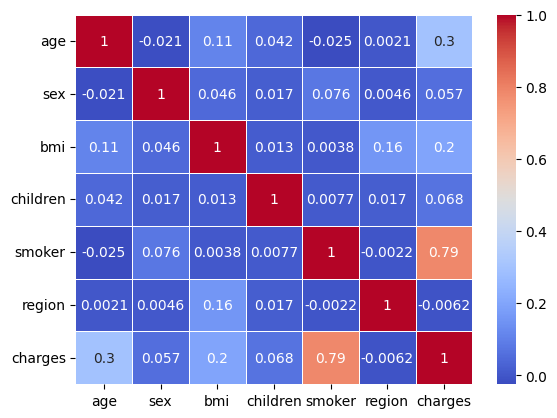

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# code
corr_matrix = data_frame.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


In [15]:
pip install seaborn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [16]:
data_frame.head()
data_frame=data_frame.drop('region', axis=1)

#STEP 4: SPLITTING THE DATA INTO TRAINING AND TEST SETS

In [17]:
#feature selection
x = data_frame.iloc[:, :-1]
y = data_frame.iloc[:,data_frame.shape[1]-1]

In [18]:
x.head

<bound method NDFrame.head of       age  sex       bmi  children  smoker
0      19    0  0.321227         0       1
1      18    1  0.479150         1       0
2      28    1  0.458434         3       0
3      33    1  0.181464         0       0
4      32    1  0.347592         0       0
...   ...  ...       ...       ...     ...
1333   50    1  0.403820         3       0
1334   18    0  0.429379         0       0
1335   18    0  0.562012         0       0
1336   21    0  0.264730         0       0
1337   61    0  0.352704         0       1

[1338 rows x 5 columns]>

In [19]:
y.head

<bound method NDFrame.head of 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64>

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

#STEP 5: BUILDING THE MODEL TO FIT THE TRAINING DATA

In [21]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

#STEP 6: USING THE MODEL TO MAKE PREDICTIONS FOR THE TEST DATA SET

In [23]:
y_pred = model.predict(x_test)

In [24]:
print(f'b = {model.intercept_}')
print(f'w = {model.coef_}')

b = -7072.922874624714
w = [  260.03578967    66.06974502 12175.40494199   434.80431165
 23628.2381829 ]


#STEP 7: EVALUATING OUR MODEL PERFORMANCE

In [25]:
#evaluating model perfomance
new_predictions = model.predict(x_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test,new_predictions))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, new_predictions))

Mean squared error: 35428074.00
Coefficient of determination: 0.77


In [26]:
data_frame.head()

,age,sex,bmi,children,smoker,charges
0,19,0,0.321227,0,1,16884.92400
1,18,1,0.479150,1,0,1725.55230
2,28,1,0.458434,3,0,4449.46200
3,33,1,0.181464,0,0,21984.47061
4,32,1,0.347592,0,0,3866.85520


In [27]:
#making predictions
data = {
'age':[61],
'sex':[0],
'bmi':[29.07],
'children':[0],
'smoker':[1],
}

data = pd.DataFrame(data)
val = model.predict(data)
print(val)

[386356.52014202]
